# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [14]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

## Cargar datos

In [15]:
# cargar datos
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')  


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [16]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [17]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*La información general muestra que ésta tabla contiene dos entradas, una para el plan surf y otra para el plan ultimate, no tiene tipos de datos inadecuados ni datos ausentes, sin embargo la columna "usd_monthly_pay", en la descripción aparece como "usd_monthly_fee", sera mejor hacer el cambio; para enriquecer los datos, también se podria cambiar la columna "usd_per_message" por "usd_per_message_extra", para determinar que se debe a exceder los límites presupuestados, igualmente con la columna de mensajes y gigas. Ahora con fines de mejorar la visualización se podria poner la columna "plan_name", de primer lugar.*

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
print('Datos duplicados:' ,plans.duplicated().sum())
print()
plans = plans.rename(columns={'usd_monthly_pay':'usd_monthly_fee'})
plans.head(2)

Datos duplicados: 0



,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
plans = plans.rename(columns={'usd_per_gb':'usd_per_gb_extra',
                              'usd_per_message':'usd_per_message_extra',
                              'usd_per_minute':'usd_per_minute_extra'})
new_order = ['plan_name'] + [col for col in plans.columns if col != 'plan_name']
plans = plans[new_order]
plans.sample(2)

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb_extra,usd_per_message_extra,usd_per_minute_extra
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Usuarios/as

In [20]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
# Imprime una muestra de datos para usuarios
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
430,1430,Myung,Pugh,63,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-07,surf,NaN
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaN
280,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaN
136,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Esta tabla presenta la información principal de los usuarios y no contiene datos duplicados; sin embargo existe una gran cantidad de datos nulos en la columna "churn_date", dado que es la fecha donde el usuario dejo de usar el servicio, asi que reemplazaré estos datos por "aún activo", también modificaré el tipo de dato de la columna user_id a object asi como el de la columna reg_dte a datetime. Para enriquecer los datos modificaré los nombres de las columnas age y plan a user_age y plan_name respectivamente.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [56]:
print('Datos duplicados:',users.duplicated().sum())
print()
users['user_id'] = users['user_id'].astype('str')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
print('El tipo de dato de la columna user_id ahora es:', users['user_id'].dtype)
print('El tipo de dato de la columna reg_date ahora es:', users['reg_date'].dtype)
print()
users.sample(5)

Datos duplicados: 0

El tipo de dato de la columna user_id ahora es: object
El tipo de dato de la columna reg_date ahora es: datetime64[ns]



,user_id,first_name,last_name,user_age,city,reg_date,plan_name,churn_date
230,1230,Andre,Estes,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-27,ultimate,still_active
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,still_active
254,1254,Billy,Webb,49,"Detroit-Warren-Dearborn, MI MSA",2018-08-03,surf,still_active
145,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,still_active
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,still_active


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
users.rename(columns = {'age':'user_age', 'plan':'plan_name'}, inplace=True)
users = users.fillna('still_active')
users.sample(2)

,user_id,first_name,last_name,user_age,city,reg_date,plan_name,churn_date
216,1216,Reita,Atkins,29,"San Francisco-Oakland-Berkeley, CA MSA",2018-06-19,surf,still_active
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,still_active


## Llamadas

In [24]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [25]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)

,id,user_id,call_date,duration
14385,1059_621,1059,2018-12-24,18.12
114640,1401_458,1401,2018-12-08,0.00
55688,1199_353,1199,2018-12-05,2.66
118798,1414_96,1414,2018-11-22,10.00
54308,1196_190,1196,2018-12-26,6.26
18921,1072_365,1072,2018-08-05,2.49
105501,1372_38,1372,2018-12-30,3.79
8205,1039_145,1039,2018-12-25,10.69
58781,1212_285,1212,2018-10-24,4.38
42138,1155_86,1155,2018-02-23,19.64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Ésta tabla nos muestra la información principal de las llamadas realizadas por cada usuario, no tiene datos nulos ni datos duplicados, sin embargo será mejor cambiar el tipo de datos de la columna user_id de int a str y de la columna call_date de str a datetime, también modificaré el nombre de la columna duration a duration_call y la columna id por call_id.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [26]:
print('Datos duplicados:',calls.duplicated().sum())
print()
calls['user_id'] = calls['user_id'].astype('str')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
print(calls.dtypes)

Datos duplicados: 0

id                   object
user_id              object
call_date    datetime64[ns]
duration            float64
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [27]:
calls = calls.rename(columns={'duration':'call_duration', 'id':'call_id'})
calls.sample(2)

,call_id,user_id,call_date,call_duration
115936,1406_162,1406,2018-12-26,10.68
31863,1120_233,1120,2018-05-30,17.27


## Mensajes

In [28]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)

,id,user_id,message_date
72015,1467_347,1467,2018-08-20
9934,1075_189,1075,2018-10-27
60114,1381_227,1381,2018-09-30
3481,1036_316,1036,2018-10-22
69135,1448_224,1448,2018-11-14
70428,1458_95,1458,2018-12-17
8273,1061_279,1061,2018-12-18
58805,1373_223,1373,2018-12-22
57839,1364_171,1364,2018-12-14
52763,1337_7,1337,2018-12-27


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Ésta tabla contiene la información de fecha y usuario acerca de los mensajes, no tiene datos nulos ni duplicados. Le corregiré el tipo de dato a la columna user_id y a la columna message_date, también le modificaré el nombre a la columna id por message_id.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [30]:
print('Datos duplicados:' ,messages.duplicated().sum())
print()
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
print(messages.dtypes)

Datos duplicados: 0

id                      object
user_id                 object
message_date    datetime64[ns]
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [31]:
messages = messages.rename(columns = {'id':'message_id'})
messages.sample(2)

,message_id,user_id,message_date
64215,1408_340,1408,2018-10-30
67735,1439_129,1439,2018-09-18


## Internet

In [32]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)

,id,user_id,session_date,mb_used
45696,1203_21,1203,2018-12-20,0.00
102853,1492_86,1492,2018-10-15,312.68
73371,1345_36,1345,2018-11-26,565.97
56450,1255_114,1255,2018-08-26,236.78
82554,1385_305,1385,2018-11-15,865.45
88680,1408_399,1408,2018-04-15,508.94
72746,1338_148,1338,2018-12-01,460.55
88890,1409_213,1409,2018-11-03,172.04
36781,1165_233,1165,2018-11-10,31.03
40330,1181_551,1181,2018-05-05,302.51


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Ésta tabla muestra información acerca de las sesiones web de cada usuario, no tiene datos nulos ni datos duplicados, sin embargo para tener un mejor manejo de la información le cambiaré el tipo de datos de la columna user_id a str y de la columna sesion_date a datetime, también modificaré el nombre de la columna id por session_id.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [34]:
print('Datos duplicados:' ,internet.duplicated().sum())
print()
internet['user_id'] = internet['user_id'].astype('str')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
print(internet.dtypes)

Datos duplicados: 0

id                      object
user_id                 object
session_date    datetime64[ns]
mb_used                float64
dtype: object


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [35]:
internet = internet.rename(columns ={'id':'session_id'})
internet.sample(2)

,session_id,user_id,session_date,mb_used
84668,1395_33,1395,2018-12-25,132.63
65090,1299_378,1299,2018-03-19,365.55


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [36]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head(2)
#plans.info()

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb_extra,usd_per_message_extra,usd_per_minute_extra
0,surf,50,15360,500,20,10,0.03,0.03
1,ultimate,1000,30720,3000,70,7,0.01,0.01


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [37]:
calls['month'] = calls['call_date'].dt.month

calls_per_month = calls.groupby(['user_id', 'month']).size().reset_index(name='num_calls')

print(calls_per_month.head(10))
calls.sample(5)

  user_id  month  num_calls
0    1000     12         16
1    1001      8         27
2    1001      9         49
3    1001     10         65
4    1001     11         64
5    1001     12         56
6    1002     10         11
7    1002     11         55
8    1002     12         47
9    1003     12        149


,call_id,user_id,call_date,call_duration,month
42604,1156_209,1156,2018-08-05,6.95,8
8510,1039_450,1039,2018-11-24,1.17,11
42171,1155_121,1155,2018-07-09,11.37,7
80559,1291_159,1291,2018-05-31,14.02,5
136391,1494_233,1494,2018-09-12,0.00,9


In [38]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user = calls.groupby(['user_id','month'])['call_duration'].sum().reset_index()
print(minutes_per_user.head(10))

  user_id  month  call_duration
0    1000     12         116.83
1    1001      8         171.14
2    1001      9         297.69
3    1001     10         374.11
4    1001     11         404.59
5    1001     12         392.93
6    1002     10          54.13
7    1002     11         359.76
8    1002     12         363.24
9    1003     12        1041.00


In [39]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month']).size().reset_index(name='num_messages')

print(messages_per_month.head(10))
messages.sample(5)

  user_id  month  num_messages
0    1000     12            11
1    1001      8            30
2    1001      9            44
3    1001     10            53
4    1001     11            36
5    1001     12            44
6    1002     10            15
7    1002     11            32
8    1002     12            41
9    1003     12            50


,message_id,user_id,message_date,month
24275,1145_130,1145,2018-08-05,8
56515,1357_141,1357,2018-09-18,9
56617,1357_325,1357,2018-09-30,9
57360,1362_442,1362,2018-03-22,3
27318,1167_275,1167,2018-11-14,11


In [40]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
mb_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='mb_used_per_month')

print(mb_per_month.head(10))
internet.sample(5)

  user_id  month  mb_used_per_month
0    1000     12            1901.47
1    1001      8            6919.15
2    1001      9           13314.82
3    1001     10           22330.49
4    1001     11           18504.30
5    1001     12           19369.18
6    1002     10            6552.01
7    1002     11           19345.08
8    1002     12           14396.24
9    1003     12           27044.14


,session_id,user_id,session_date,mb_used,month
47177,1211_54,1211,2018-12-05,618.85,12
88559,1408_278,1408,2018-06-09,2.25,6
13104,1062_74,1062,2018-11-06,395.08,11
70376,1328_335,1328,2018-08-28,344.27,8
60419,1273_293,1273,2018-10-30,84.04,10


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [41]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion_1 = mb_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
final_fusion = fusion_1.merge(minutes_per_user, on=['user_id', 'month'], how='outer' )
final_fusion.fillna(0, inplace=True)
final_fusion.sample(5)

,user_id,month,mb_used_per_month,num_messages,call_duration
53,1012,11,13935.03,0.0,71.42
386,1081,4,92.31,3.0,15.69
1921,1409,11,23534.62,29.0,254.06
666,1140,10,16832.50,16.0,825.87
2239,1490,8,39316.23,0.0,488.29


In [42]:
# Añade la información de la tarifa
information_plan = users[['user_id','plan_name','city']].merge(plans, on='plan_name', how='inner')
total_fusion = final_fusion.merge(information_plan, on='user_id', how='left')
total_fusion.sample(5)
total_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   object 
 1   month                  2293 non-null   int32  
 2   mb_used_per_month      2293 non-null   float64
 3   num_messages           2293 non-null   float64
 4   call_duration          2293 non-null   float64
 5   plan_name              2293 non-null   object 
 6   city                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_fee        2293 non-null   int64  
 11  usd_per_gb_extra       2293 non-null   int64  
 12  usd_per_message_extra  2293 non-null   float64
 13  usd_per_minute_extra   2293 non-null   float64
dtypes: float64(5), int32(1), int64(5), object(3)
memory usag

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [57]:
# Calcula el ingreso mensual para cada usuario
total_fusion['minutes_extra'] = total_fusion['call_duration'] - total_fusion['minutes_included']
total_fusion['messages_extra'] = total_fusion['num_messages'] - total_fusion['messages_included']
internet_extra = total_fusion['mb_used_per_month'] - total_fusion['mb_per_month_included']
total_fusion['gb_internet_extra'] = (internet_extra/1024).apply(lambda x: max(0, np.ceil(x)))

total_fusion[['minutes_extra','messages_extra','gb_internet_extra']] = total_fusion[['minutes_extra','messages_extra','gb_internet_extra']].clip(lower=0)
total_fusion['extra_fee'] = (total_fusion['minutes_extra'] * total_fusion['usd_per_minute_extra'] +
                           total_fusion['messages_extra'] * total_fusion['usd_per_message_extra'] +
                           total_fusion['gb_internet_extra'] * total_fusion['usd_per_gb_extra'])

total_fusion['pay_month'] = (total_fusion['extra_fee'] + total_fusion['usd_monthly_fee'])

print(total_fusion[['user_id','month','pay_month','plan_name']].sample(5))
total_fusion.sample()

     user_id  month  pay_month plan_name
2087    1451     11      70.00  ultimate
2200    1477     12      70.00  ultimate
1975    1421     12      61.11      surf
1336    1285     12      20.00      surf
1186    1252      6      20.00      surf


,user_id,month,mb_used_per_month,num_messages,call_duration,plan_name,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb_extra,usd_per_message_extra,usd_per_minute_extra,minutes_extra,messages_extra,gb_internet_extra,extra_fee,pay_month
65,1017,11,19093.04,29.0,362.34,surf,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",50,15360,500,20,10,0.03,0.03,0.0,0.0,4.0,40.0,60.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

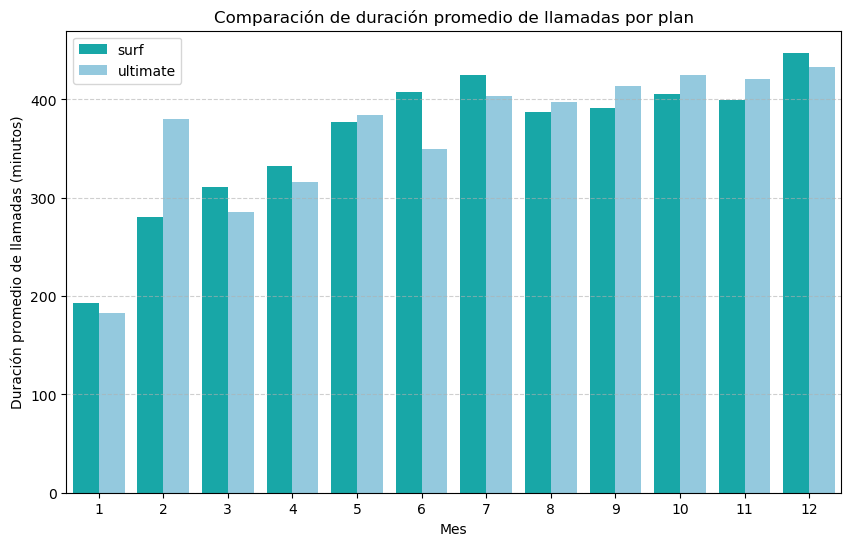

In [58]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_duration = total_fusion.groupby(['plan_name', 'month'])['call_duration'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='call_duration', hue='plan_name', palette=['c', '#87CEEB'], data=avg_duration)
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Comparación de duración promedio de llamadas por plan')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

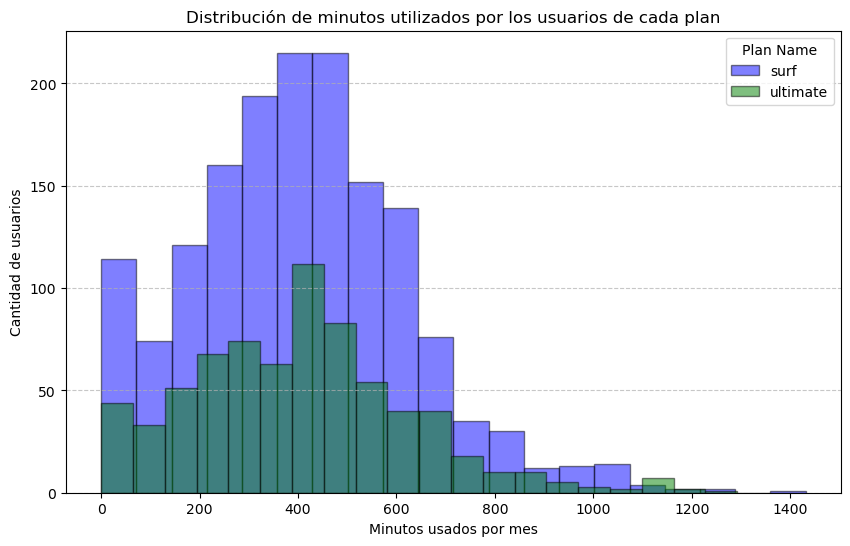

In [45]:
# Filtrar minutos por plan
monthly_minutes = total_fusion.groupby(['user_id','plan_name','month'])['call_duration'].sum().reset_index()
surf_minutes = monthly_minutes[monthly_minutes['plan_name'] == 'surf']['call_duration']
ultimate_minutes = monthly_minutes[monthly_minutes['plan_name'] == 'ultimate']['call_duration']

plt.figure(figsize=(10, 6))
plt.hist(surf_minutes, bins=20, alpha=0.5, label='surf', color='b', edgecolor='black')
plt.hist(ultimate_minutes, bins=20, alpha=0.5, label='ultimate', color='green', edgecolor='black')
plt.xlabel('Minutos usados por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de minutos utilizados por los usuarios de cada plan')
plt.legend(title='Plan Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [46]:
# Calcula la media y la varianza de la duración mensual de llamadas.
monthly_minutes = total_fusion.groupby(['user_id', 'plan_name', 'month'])['call_duration'].sum().reset_index()
med_duration = monthly_minutes['call_duration'].mean()
var_duration = monthly_minutes['call_duration'].var()
std = np.sqrt(var_duration)

print(f'Media de la duración mensual de llamadas: {med_duration:.2f} minutos')
print(f'Varianza de la duración mensual de llamadas: {var_duration:.2f} minutos²')
print(f'Desviación estandar de la duración mensual de llamadas: {std:.2f} minutos')
print()
print(f'Media de la duración de las llamadas para el plan Surf: {surf_minutes.mean():.2f}')
print(f'Desviación estandar de la duración de las llamadas para el plan Surf: {np.std(surf_minutes):.2f}')
print(f'Media de la duración de las llamadas para el plan Ultimate: {ultimate_minutes.mean():.2f}')
print(f'Desviación estandar de la duración de las llamadas para el plan Ultimate: {np.std(ultimate_minutes):.2f}')



Media de la duración mensual de llamadas: 405.21 minutos
Varianza de la duración mensual de llamadas: 49900.20 minutos²
Desviación estandar de la duración mensual de llamadas: 223.38 minutos

Media de la duración de las llamadas para el plan Surf: 404.76
Desviación estandar de la duración de las llamadas para el plan Surf: 221.59
Media de la duración de las llamadas para el plan Ultimate: 406.19
Desviación estandar de la duración de las llamadas para el plan Ultimate: 227.09


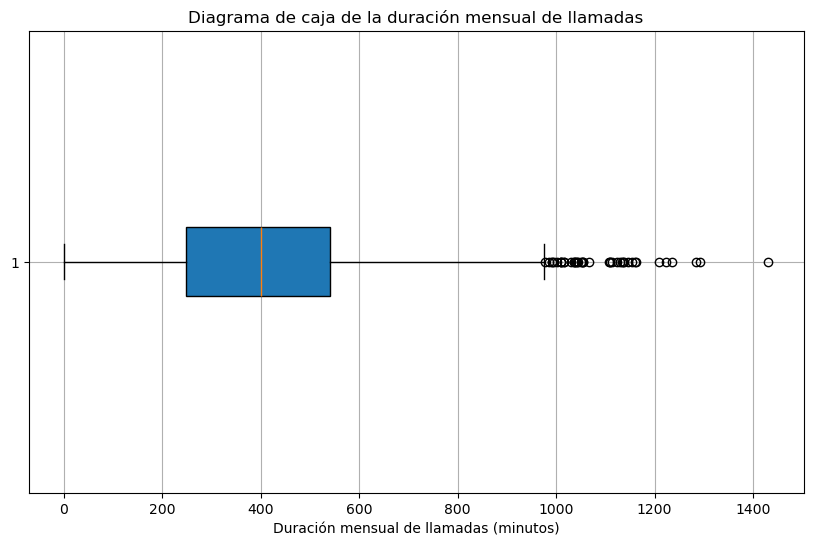

In [47]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
monthly_duration = total_fusion.groupby(['user_id', 'month'])['call_duration'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_duration['call_duration'], vert=False, patch_artist=True)
plt.xlabel("Duración mensual de llamadas (minutos)")
plt.title("Diagrama de caja de la duración mensual de llamadas")
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

*El comportamiento de los usuarios respecto a las llamadas no difiere significativamente dependiendo los planes, realmente en cuanto al consumo de minutos se comportan de la misma manera, siguen una distribución con tendencia normal manteniendo la media entre 405 y 407 minutos con un sesgo positivo lo que indica que hay una menor cantidad de usuarios que usan más minutos que el promedio, la única diferencia marcada es en cuanto a la cantidad de usuarios de cada plan.*

### Mensajes

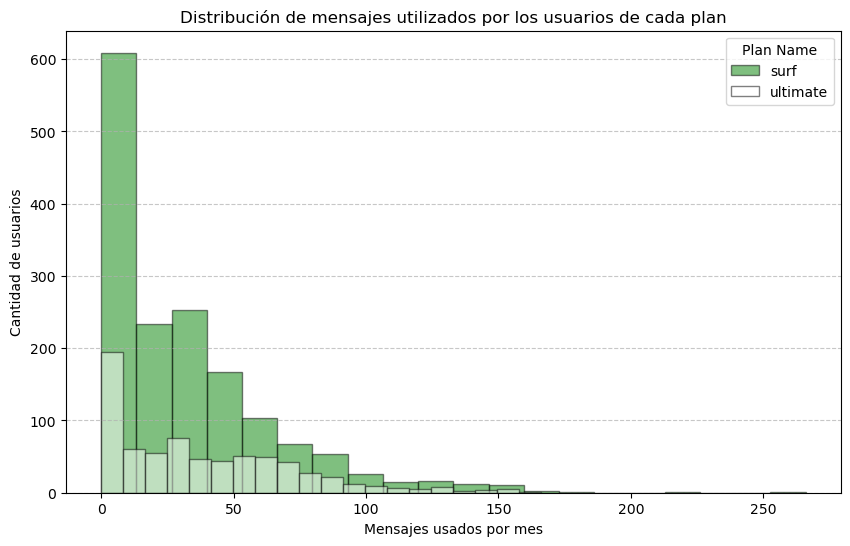

In [48]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
monthly_messages = total_fusion.groupby(['user_id','plan_name','month'])['num_messages'].sum().reset_index()
surf_messages = monthly_messages[monthly_messages['plan_name'] == 'surf']['num_messages']
ultimate_messages = monthly_messages[monthly_messages['plan_name'] == 'ultimate']['num_messages']

plt.figure(figsize=(10, 6))
plt.hist(surf_messages, bins=20, alpha=0.5, label='surf', color='g', edgecolor='black')
plt.hist(ultimate_messages, bins=20, alpha=0.5, label='ultimate', color='white', edgecolor='black')
plt.xlabel('Mensajes usados por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de mensajes utilizados por los usuarios de cada plan')
plt.legend(title='Plan Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

*El comportamiento de los usuarios a la hora de usar los mensajes de texto no varia respecto a cada plan que usan, se puede ver que para ambos planes el uso se distribuye con un sesgo a la derecha concentrando la mayoria de datos entre 0 y 10 mensajes aproximadamente, el promedio de mensajes usados es de 34 aproximadamente y teniendo una camtidad cada vez menor de usuarios que usan mayor cantidad de mensajes.*

### Internet

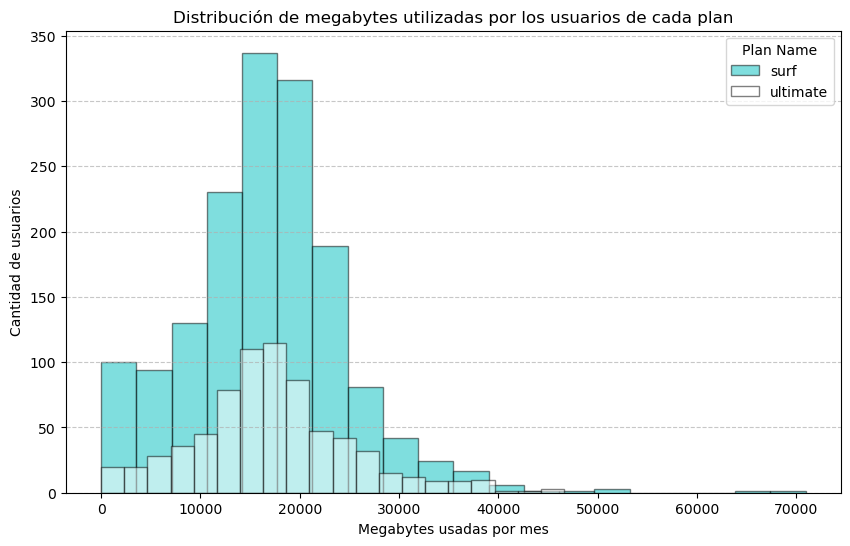

In [49]:
monthly_mb = total_fusion.groupby(['user_id','plan_name','month'])['mb_used_per_month'].sum().reset_index()
surf_megabytes = monthly_mb[monthly_mb['plan_name'] == 'surf']['mb_used_per_month']
ultimate_megabytes = monthly_mb[monthly_mb['plan_name'] == 'ultimate']['mb_used_per_month']

plt.figure(figsize=(10, 6))
plt.hist(surf_megabytes, bins=20, alpha=0.5, label='surf', color='c', edgecolor='black')
plt.hist(ultimate_megabytes, bins=20, alpha=0.5, label='ultimate', color='white', edgecolor='black')
plt.xlabel('Megabytes usadas por mes')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de megabytes utilizadas por los usuarios de cada plan')
plt.legend(title='Plan Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [50]:
print(f'Media de Gigabytes usadas plan Surf: {surf_megabytes.mean()/1024:.2f} Gb.')
print(f'Desviación estandar de Gigabytes plan Surf: {np.std(surf_megabytes)/1024:.2f} Gb.')
print(f'Media de Gigabytes usadas plan Ultimate: {ultimate_megabytes.mean()/1024:.2f} Gb.')
print(f'Desviación estandar de Gigabytes plan Ultimate: {np.std(ultimate_megabytes)/1024:.2f} Gb.')

Media de Gigabytes usadas plan Surf: 16.17 Gb.
Desviación estandar de Gigabytes plan Surf: 7.82 Gb.
Media de Gigabytes usadas plan Ultimate: 16.81 Gb.
Desviación estandar de Gigabytes plan Ultimate: 7.66 Gb.


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

*Según lo observado y los datos estadísticos calculados, el tráfico de internet tiende a seguir una distribución normal, encontrando la media de Gigabytes usadas en 17 Gb aproximadamente para ambos planes, así pues sin importar el tipo de plan los usuarios tienden a consumir el internet de la misma manera. Ahora bien existen algunos daatos atipicamente altos, estos son de usuarios que exedieron y generan datos extremos.*

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

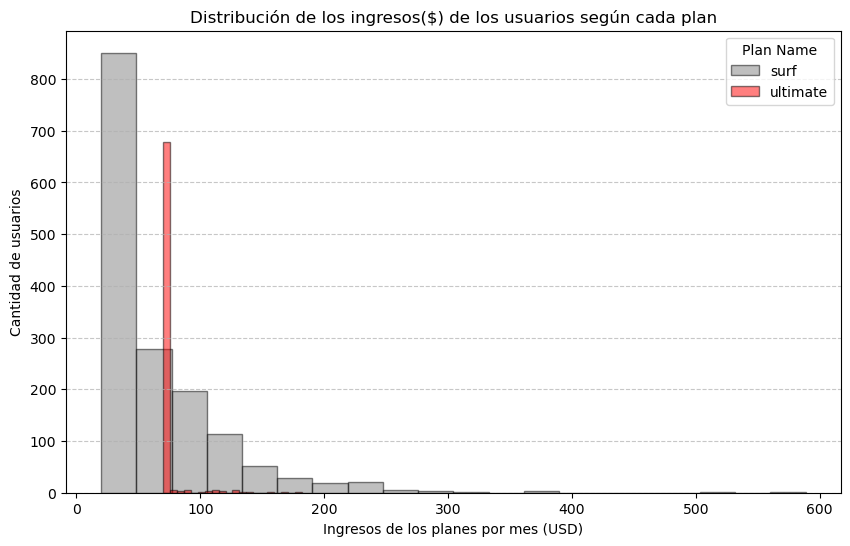

In [51]:
monthly_mb = total_fusion.groupby(['user_id','plan_name','month'])['pay_month'].sum().reset_index()
surf_pay = monthly_mb[monthly_mb['plan_name'] == 'surf']['pay_month']
ultimate_pay = monthly_mb[monthly_mb['plan_name'] == 'ultimate']['pay_month']

plt.figure(figsize=(10, 6))
plt.hist(surf_pay, bins=20, alpha=0.5, label='surf', color='grey', edgecolor='black')
plt.hist(ultimate_pay, bins=20, alpha=0.5, label='ultimate', color='r', edgecolor='black')
plt.xlabel('Ingresos de los planes por mes (USD)')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de los ingresos($) de los usuarios según cada plan')
plt.legend(title='Plan Name')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
surf = total_fusion[total_fusion['plan_name'] == 'surf']['pay_month']
ultimate = total_fusion[total_fusion['plan_name'] == 'ultimate']['pay_month']
total_pay = total_fusion['pay_month']

In [53]:
print(f'Promedio de los ingresos totales: ${total_pay.mean():.2f}')
print(f'Desviación estandar de los ingresos totales: ${np.std(total_pay):.2f}')
print()
print(f'Media de los ingresos del plan Surf: ${surf.mean():.2f}')
print(f'Desviación estandar de los ingresos del plan Surf: ${np.std(surf):.2f}')
print(f'Media de los ingresos del plan Ultimate: ${ultimate.mean():.2f}')
print(f'Desviación estandar de los ingresos del plan Ultimate: ${np.std(ultimate):.2f}')
print()
print(f'El ingreso total es: ${total_pay.sum():.2f}')
print(f'Ingreso anual por clientes Surf: ${surf.sum():.2f}')
print(f'Ingreso anual por clientes Ultimate: ${ultimate.sum():.2f}')

Promedio de los ingresos totales: $64.09
Desviación estandar de los ingresos totales: $46.53

Media de los ingresos del plan Surf: $60.33
Desviación estandar de los ingresos del plan Surf: $55.25
Media de los ingresos del plan Ultimate: $72.31
Desviación estandar de los ingresos del plan Ultimate: $11.39

El ingreso total es: $146960.92
Ingreso anual por clientes Surf: $94894.92
Ingreso anual por clientes Ultimate: $52066.00


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]


*El análisis de los ingresos totales anuales revela que los usuarios del plan Surf generaron USD 94,894.92, mientras que los del plan Ultimate generaron USD 52,066.00. A pesar de que el plan Ultimate tiene una cuota mensual significativamente más alta (USD 70 frente a USD 20 de Surf), el ingreso total generado  por los usuarios de Surf es considerablemente superior. Esto puede deberse a una  mayor cantidad de usuarios en el plan Surf, o a que los usuarios de Surf tienden a exceder los límites de su plan con mayor frecuencia (lo que genera cargos adicionales), mientras que los usuarios de Ultimate podrían estar dentro del paquete incluido. En consecuencia, desde el punto de vista del ingreso total aportado a lo largo del año, 
el plan Surf representa una mayor fuente de ingresos para la empresa*

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

*Hipótesis nula (H₀): El ingreso promedio mensual de los usuarios de Surf es igual al de los usuarios de Ultimate.*

*Hipótesis alternativa (H₁): El ingreso promedio mensual de los usuarios de Surf es diferente al de los usuarios de Ultimate*

*Significancia del 5%*

In [54]:
# Prueba las hipótesis
hip_surf = total_fusion[total_fusion['plan_name']=='surf']['pay_month']
hip_ultimate = total_fusion[total_fusion['plan_name']=='ultimate']['pay_month']

alpha = .05
result = st.ttest_ind(hip_surf, hip_ultimate, equal_var=False)
print('Valor p:', result.pvalue)

if result.pvalue < alpha:
    print('¡Rechazamos la hipotesis nula!')
else: 
    print('No podemos rechazar la hipotesis nula')
print()

Valor p: 3.5320199509520717e-16
¡Rechazamos la hipotesis nula!



[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

*Hipótesis nula (H₀): El ingreso promedio mensual de los usuarios de Nueva York y Nueva Jersey es igual al de los usuarios del resto del país.*

*Hipótesis alternativa (H₁): El ingreso promedio mensual de los usuarios de Nueva York y Nueva Jersey es diferente al del resto.*

*Significancia de 5%*

In [55]:
# Prueba las hipótesis
ny_nj = total_fusion[total_fusion['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['pay_month']
others = total_fusion[~total_fusion['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]['pay_month']

alpha = 0.05
result = st.ttest_ind(ny_nj, others, equal_var=False)
print('Valor p:', result.pvalue)

if result.pvalue < alpha:
    print('¡Rechazamos la hipótesis nula!')
else:
    print('¡No podemos rechazar la hipótesis nula!')

Valor p: 0.031214139070912725
¡Rechazamos la hipótesis nula!


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

*Se realizó un análisis detallado de los ingresos generados por las tarifas Surf y Ultimate, así como por regiones geográficas. A través de las pruebas estadísticas aplicadas, se obtuvieron los siguientes resultados:*

**Comparación entre tarifas:**

*Se comparó el ingreso mensual promedio de los clientes de los planes Surf y Ultimate. El valor p obtenido en la prueba fue menor que 0.05, por lo que se rechazó la hipótesis nula. Esto indica que hay una diferencia estadísticamente significativa entre los ingresos generados por cada tarifa. Y esto lo podemos confirmar a traves de las pruebas y análisis elaborados anteriormente acerca de los ingresos.*

**Comparación por región:**

*Se compararon los ingresos promedio entre usuarios de Nueva York y Nueva Jersey versus otras regiones. El valor p también fue menor que 0.05, por lo que nuevamente se rechaza la hipótesis nula. Esto sugiere que los ingresos promedio en NY/NJ son diferentes a los del resto del país, lo que puede reflejar diferencias en el uso del servicio o en las preferencias por tarifa.*

**Ahora bien, a modo de recomendaciones generales:**

*1- se podría invertir más en el plan Ultimate, ya que demuestra mayor rentabilidad por usuario, y como existen alguno usuarios del plan Surf que exedieron los límites del pan, ofrecerles la posibilidad de cambiar al plan Ultimate y todos sus beneficios podria ser atractivo.*

*2- Analizar más a fondo por qué en ciertas regiones como Nueva York y Nueva Jersey los ingresos se comportan diferente: ¿es por mayor consumo? ¿preferencia de plan? o que otros factores pueden determinar esta situación.*

*3- Explorar la posibilidad de crear un plan intermedio entre Surf y Ultimate para captar a los usuarios que hoy superan los límites de Surf, pero no están listos para pagar el costo del plan más alto.*